# Ondřejov Dataset Statistics

In [1]:
import pandas
import numpy
from matplotlib import pyplot

In [2]:
%matplotlib inline

In [3]:
# read the dataset
spectra = pandas.read_csv('data/ondrejov-dataset.csv')
spectra['date-obs'] = pandas.to_datetime(spectra['date-obs'])
# preview non-fluxes columns
spectra.iloc[:, :12].head()

,id,dec,gratang,detector,expval,object,dichmir,chipid,ra,specfilt,label,date-obs
0,a201305230017,-11:09:40.70,30.25,PyLoN 2048x512BX,19.246130,alp Vir,2,E2V 42-10 BX,13:25:11.580,1,absorption,2013-05-23
1,a201306060015,+19:10:56.60,30.25,PyLoN 2048x512BX,0.009187,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,absorption,2013-06-06
2,a201306060016,+19:10:56.60,30.25,PyLoN 2048x512BX,0.012332,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,absorption,2013-06-06
3,a201306060018,+33:21:45.60,30.25,PyLoN 2048x512BX,5.056532,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,emission,2013-06-06
4,a201306060019,+33:21:45.60,30.25,PyLoN 2048x512BX,15.040130,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,emission,2013-06-06


In [4]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12936 entries, 0 to 12935
Columns: 152 entries, id to 6732.0
dtypes: datetime64[ns](1), float64(142), int64(2), object(7)
memory usage: 15.0+ MB


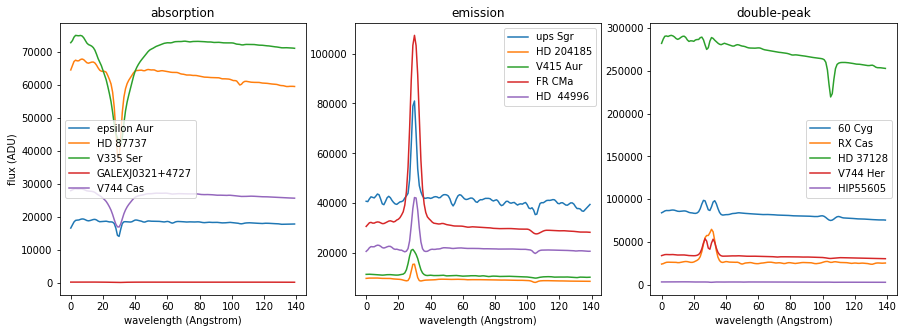

In [5]:
def preview_classes(spectra):
    fig, axes = pyplot.subplots(ncols=3, figsize=(15, 5))
    axes[0].set_ylabel('flux (ADU)')
    for ax, label in zip(axes, spectra['label'].unique()):
        for idx, spectrum in spectra[spectra['label'] == label].sample(5).iterrows():
            fluxes = spectrum.iloc[12:]
            ax.plot(fluxes.as_matrix(), label=spectrum['object'])
        ax.legend()
        ax.set_title(label)
        ax.set_xlabel('wavelength (Angstrom)')

preview_classes(spectra)

In [6]:
# missing values
spectra.iloc[:, :12].isnull().sum(axis=0)

id          0
dec         0
gratang     0
detector    0
expval      0
object      4
dichmir     0
chipid      0
ra          0
specfilt    0
label       0
date-obs    0
dtype: int64

In [7]:
spectra[spectra['object'].isnull()].iloc[:, :12]

,id,dec,gratang,detector,expval,object,dichmir,chipid,ra,specfilt,label,date-obs
7644,re060015,+21:08:33.10,30.25,SITe 2000x800,4.409,NaN,2,SITe005 800x2000,05:37:38.687,1,emission,2008-05-06
7645,re060016,+21:08:33.10,30.25,SITe 2000x800,2.766,NaN,2,SITe005 800x2000,05:37:38.687,1,emission,2008-05-06
7948,rh060012,+20:50:01.00,30.25,SITe 2000x800,20.006,NaN,2,SITe005 800x2000,18:02:23.047,1,absorption,2008-08-06
9775,th280012,-15:57:17.70,30.25,SITe 2000x800,5.003,NaN,2,SITe005 800x2000,19:21:43.607,1,emission,2010-08-28


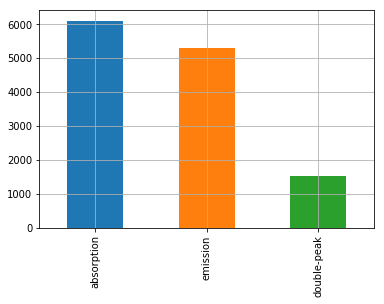

In [8]:
# classes ratio
spectra['label'].value_counts().plot.bar(grid=True)

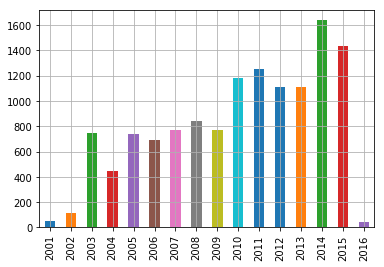

In [9]:
# number of observations by year
spectra['date-obs'].dt.year.value_counts().sort_index().plot.bar(grid=True)

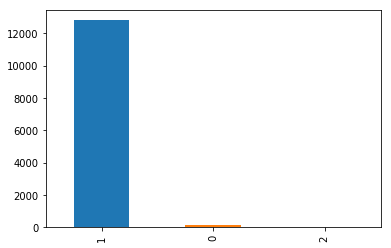

In [10]:
spectra['specfilt'].value_counts().plot.bar()

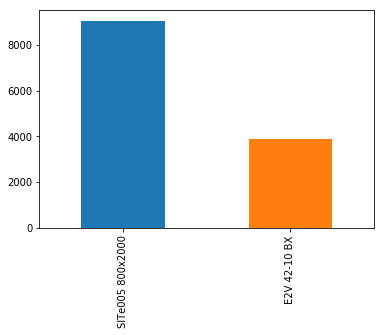

In [11]:
spectra['chipid'].value_counts().plot.bar()

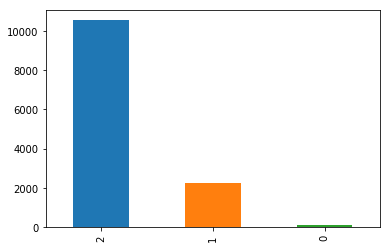

In [12]:
spectra['dichmir'].value_counts().plot.bar()

In [13]:
spectra['object'].nunique()

1306

In [14]:
spectra['object'].value_counts().sample(10)

HD14956        4
68 u Her       1
228 Eri       17
V832 Cyg       1
HD 89884       2
hd 90052       2
SY Cyg         6
HIP 118163     1
omega Ori     10
V457 Sct       1
Name: object, dtype: int64

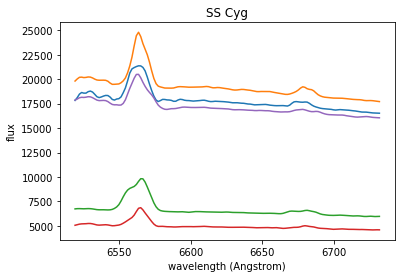

In [15]:
def plot_same_objects(name, spectra=spectra):
    waves = numpy.linspace(6519, 6732, num=140)
    fluxes = spectra.loc[spectra['object'] == name].iloc[:, 12:].as_matrix()
    for flux in fluxes:
        pyplot.plot(waves, flux)
    pyplot.legend(loc='upper right')
    pyplot.title(name)
    pyplot.xlabel('wavelength (Angstrom)')
    pyplot.ylabel('flux')

plot_same_objects('SS Cyg')

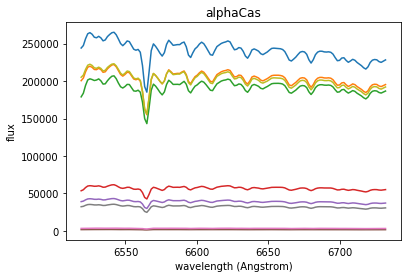

In [16]:
plot_same_objects('alphaCas')

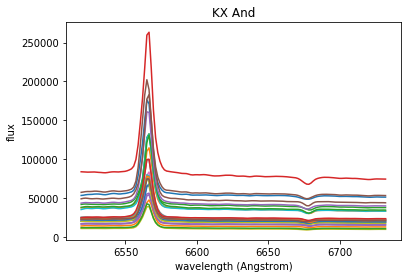

In [17]:
plot_same_objects('KX And')

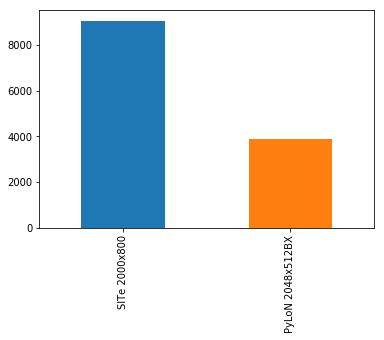

In [18]:
spectra['detector'].value_counts().plot.bar()

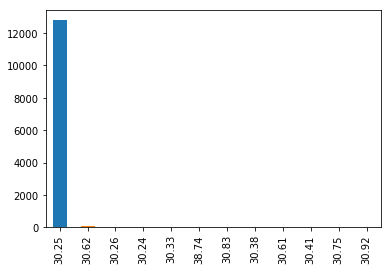

In [19]:
spectra['gratang'].value_counts().plot.bar()

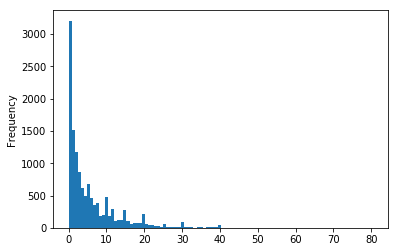

In [20]:
spectra['expval'].plot.hist(bins=100)

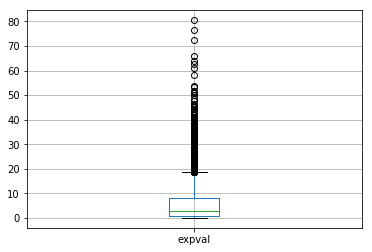

In [21]:
spectra['expval'].plot.box(grid=True)